In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Practice dataset 2 KNNClassifier drug_classification.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

In [7]:
df_new=pd.get_dummies(df,drop_first=True)

In [8]:
df_new.shape

(200, 10)

In [9]:
df_new

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Type_drugA,Drug_Type_drugB,Drug_Type_drugC,Drug_Type_drugX
0,23,25.355,False,False,False,False,False,False,False,False
1,47,13.093,True,True,False,False,False,False,True,False
2,47,10.114,True,True,False,False,False,False,True,False
3,28,7.798,False,False,True,False,False,False,False,True
4,61,18.043,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,False,True,False,False,False,False,True,False
196,16,12.006,True,True,False,False,False,False,True,False
197,52,9.894,True,False,True,False,False,False,False,True
198,23,14.020,True,False,True,True,False,False,False,True


In [14]:
# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug_Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
# Split features and target
X = df.drop(columns=['Drug_Type'])
y = df['Drug_Type']

In [18]:

# Standardize numerical features
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [26]:

# Display accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 90.00%


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

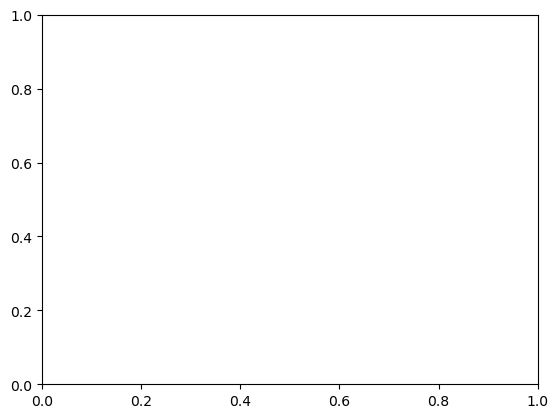

In [32]:
plt.figure()
plt.plot(k_list, f1_list, marker='o')
plt.xlabel("k value")
plt.ylabel("F1 score")
plt.title("KNN Classification Performance")
plt.grid(True)
plt.show()

In [30]:
k_list = list(range(1, 21))
f1_list = []